In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_excel('Data_Train.xlsx')
print(train.shape)
train.head()

(6019, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [330]:
train = pd.read_excel('Data_Train.xlsx')
print(train.shape)

(6019, 13)


In [306]:
#Print statistical summery of the data
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [271]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [301]:
train[train['Engine'].isnull()].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20


In [387]:
#create Name_model features from  Name feature
train['Name_model'] = train.Name.str.split().str[0:2]

#The result of line 1 produces a list, we'll join the two values in the list
train['Name_model'] = train.Name_model.apply(lambda x: ' '.join(x))
#Create name_gen feature
train['Name_gen'] = train.Name.str.split().str[0]

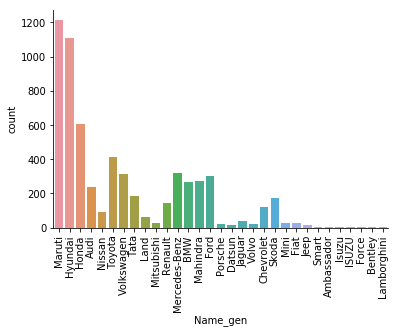

In [398]:
sns.countplot(x = train['Name_gen'])
plt.xticks(rotation = 90)
sns.despine()

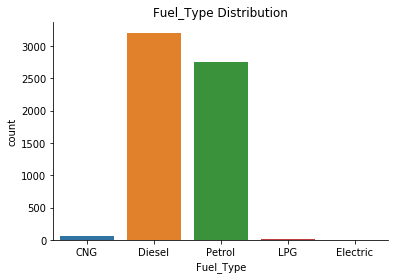

In [386]:
#Plot univariate graphs
sns.countplot(x = train['Fuel_Type'])
plt.xlabel('Fuel_Type')
plt.title('Fuel_Type Distribution')
sns.despine()

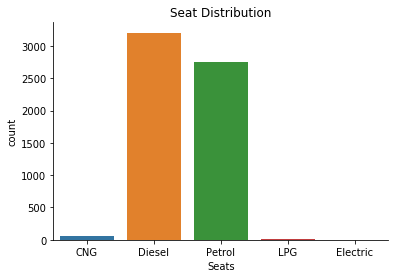

In [297]:
sns.countplot(x = train['Fuel_Type'])
plt.xlabel('Seats')
plt.title('Fuel_Type Distribution')
sns.despine()

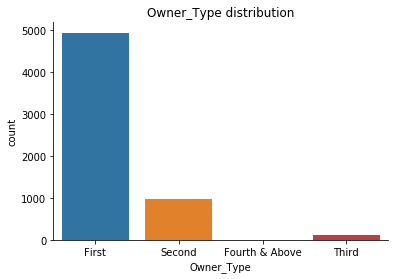

In [384]:
sns.countplot(x = train['Owner_Type'])
plt.title('Owner_Type distribution')
sns.despine()

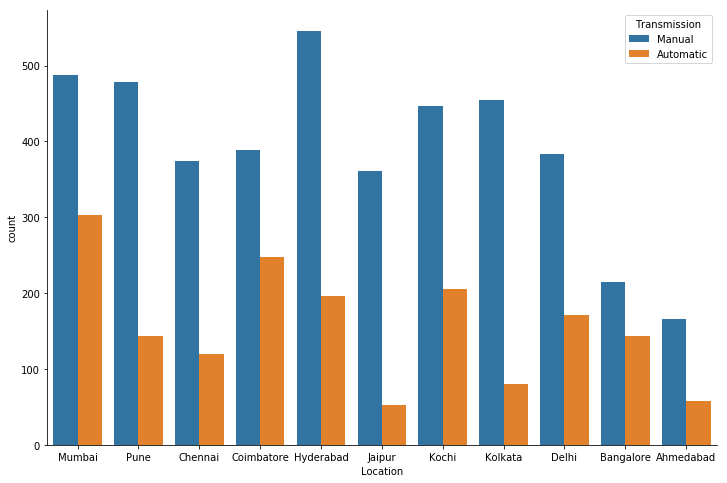

In [281]:
#multi variate plot
plt.figure(figsize = (12,8))
sns.countplot(x = train['Location'], hue = train['Transmission'])
sns.despine()
plt.show()

In [302]:
df = train[train['Kilometers_Driven'] < 6000000]

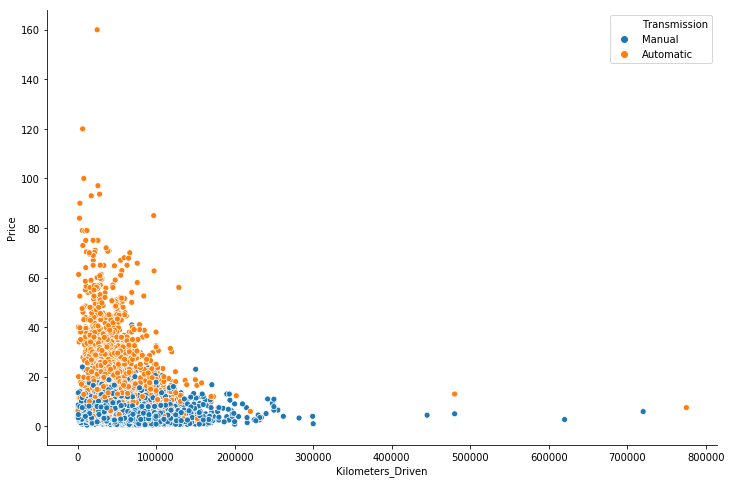

In [303]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Kilometers_Driven', y = 'Price', data = df, hue = df['Transmission'])
sns.despine()
plt.show()

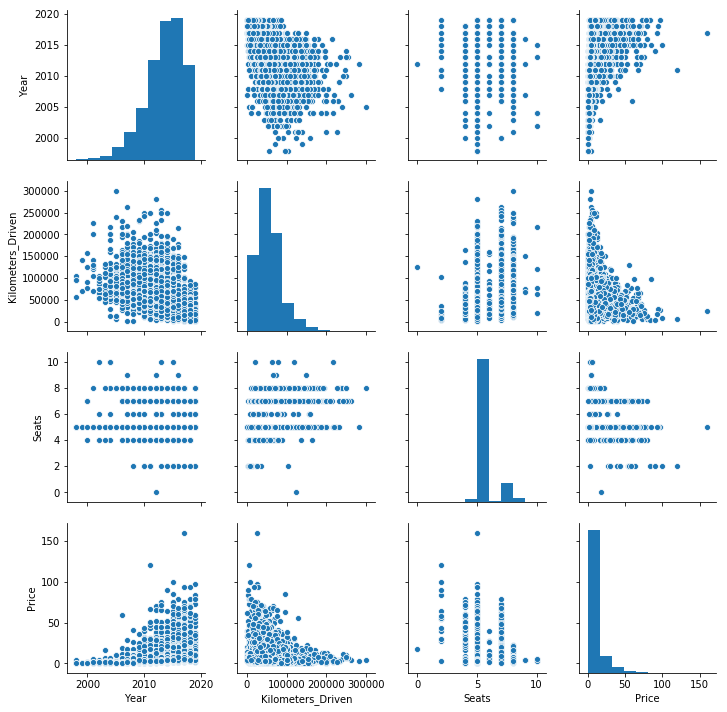

In [294]:
sns.pairplot(df)

In [332]:
train['Name_model'] = train.Name.str.split().str[0:2]
train['Name_model'] = train.Name_model.apply(lambda x: ' '.join(x))
train['Name_gen'] = train.Name.str.split().str[0]

test['Name_model'] = test.Name.str.split().str[0:2]
test['Name_model'] = test.Name_model.apply(lambda x: ' '.join(x))
test['Name_gen'] = test.Name.str.split().str[0]

In [317]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  7
Power                   7
Seats                  42
New_Price            5195
Price                   0
Name_model              0
Name_gen                0
dtype: int64

## treat missing values and null values for the train column

In [338]:
'''The logic here is, since the sum of the missing values for Engine,Power are equal and occur on the same row
We'll create a function that helps in inputing this missing values manually and use fillna for seats since the most occuring
value by a mile is 5
Mileage will also be manually inputed using the created fuction
'''

#create a function to filter Name_gen column and fill in missing values
def fillmiss_train(col_name,col_name2,col_filter_name,car_name,value1,value2):
    indx = train[(train[col_name].isna()) & (train[col_filter_name] == car_name)][col_name].index
    train[col_name][indx] = value1
    train[col_name2][indx] = value2
    
def fillmiss_train_mileage(car_name,value):
    indx = train[(train['Mileage'].isna()) & (train['Name_gen'] == car_name)]['Mileage'].index
    train['Mileage'][indx] = value
    
#Firstly input missing values based Name_gen filter
fillmiss_train('Engine','Power','Name_gen','Honda','1494 CC','90 bhp')
fillmiss_train('Engine','Power','Name_gen','Land','2179 CC', '187.7 bhp')
fillmiss_train('Engine','Power','Name_gen','Toyota','1197 CC','67 bhp')
fillmiss_train('Engine','Power','Name_gen','BMW','1995 CC', '190 bhp')
fillmiss_train('Engine','Power','Name_gen','Hyndai','1086 CC','63 bhp')
fillmiss_train('Engine','Power','Name_gen','Maruti','1200 CC','84 bhp')

#Next input missing values based on Name filter
fillmiss_train('Engine','Power','Name','Fiat Punto 1.3 Emotion','1248 CC','75 bhp')
fillmiss_train('Engine','Power','Name','Fiat Punto 1.4 Emotion','1368 CC','88 bhp')
fillmiss_train('Engine','Power','Name','Fiat Punto 1.2 Dynamic','1172 CC','67 bhp')

#Fill missing values for mileage using its created function
fillmiss_train_mileage('Mahindra','80 kpml')
fillmiss_train_mileage('Toyota','23.81 kpml')

#fill seats with 5
train['Seats'].fillna(value = 5, inplace  = True)
train['Seats'] = train.Seats.replace(0,5)

In [339]:
#Since the most occuring car_gen when Power = null bhp has been treated and when Engine = np.nan
#convert other other null bhp
#to np.nan and fill the missing values using mean imputation method



#convert the data types to numerical data types

train['Engine'] = train.Engine.str.split()
train['Engine'] = train.Engine.str[0].astype('float64')
train['Engine'].fillna(value = train['Engine'].mean(), inplace = True)

train['Mileage'] = train.Mileage.str.split()
train['Mileage'] = train.Mileage.str[0].astype('float64')

#train['Power'] = train.Power.str.split()
#train['Power'] = train.Power.str[0].astype('float64')
#train['Power'].fillna(value = train['Power'].mean(), inplace = True)


In [340]:


#function to fill in missing value in Power column labeled as null bhp
def fill_null_train(col_filter_name,car_name,value):
    indx= train[(train[col_filter_name] == car_name) & (train['Power'] == 'null bhp')]['Power'].index
    train['Power'][indx] = value


fill_null_train('Name_gen','Toyota','75 bhp')
fill_null_train('Name_gen','Fiat','67 bhp')
fill_null_train('Name_gen','Mercedes-Benz','148 bhp')
fill_null_train('Name_gen','Porsche','320 bhp')
fill_null_train('Name_gen','Nissan','65 bhp')
fill_null_train('Name_gen','Mahindra','87.5 bhp')
fill_null_train('Name_model','Tata Indica','64.4 bhp')
fill_null_train('Name_model','Ford Fiesta','80 bhp')
fill_null_train('Name_model','Ford Endeavour','75 bhp')
fill_null_train('Name_gen','Maruti','83 bhp')
fill_null_train('Name_gen','Hyundai','75 bhp')

index = train[train['Power'] == 'null bhp']['Power'].index
train['Power'][index] = np.nan

train['Power'] = train.Power.str.split()
train['Power'] = train.Power.str[0].astype('float64')
train['Power'].fillna(value = train['Power'].mean(), inplace = True)


In [341]:
#train['Power'] = train.Power.str.strip(',')
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_model,Name_gen
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti Wagon,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai Creta,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda Jazz,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti Ertiga,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi A4,Audi


In [124]:
train['Engine'] = train['Engine'].astype('int64')

In [342]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.146182,1620.718230,112.744709,5.277621,9.479468
std,3.269742,9.126884e+04,4.650978,600.144519,53.669496,0.803479,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,80.000000,5998.000000,560.000000,10.000000,160.000000


In [61]:
print(train['Mileage'].max())
print(train['Kilometers_Driven'].max())

80.0
6500000


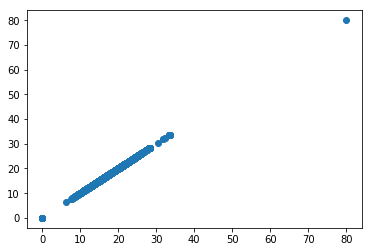

In [350]:
plt.scatter(x = train['Mileage'], y = train['Mileage'])

In [347]:
len(train[train['Price'] >= 9.95])

1510

In [62]:
print(train[data_new['Mileage'] == 80.0].index)
print(train[data_new['Kilometers_Driven'] > 6000000].index)

Int64Index([4446], dtype='int64')
Int64Index([2328], dtype='int64')


In [361]:
#Remove outliers
train.drop(index = [4446,2328],columns = ['Name','New_Price','Name_model'],inplace  = True)


In [353]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_model,Name_gen
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti Wagon,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai Creta,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda Jazz,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti Ertiga,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi A4,Audi


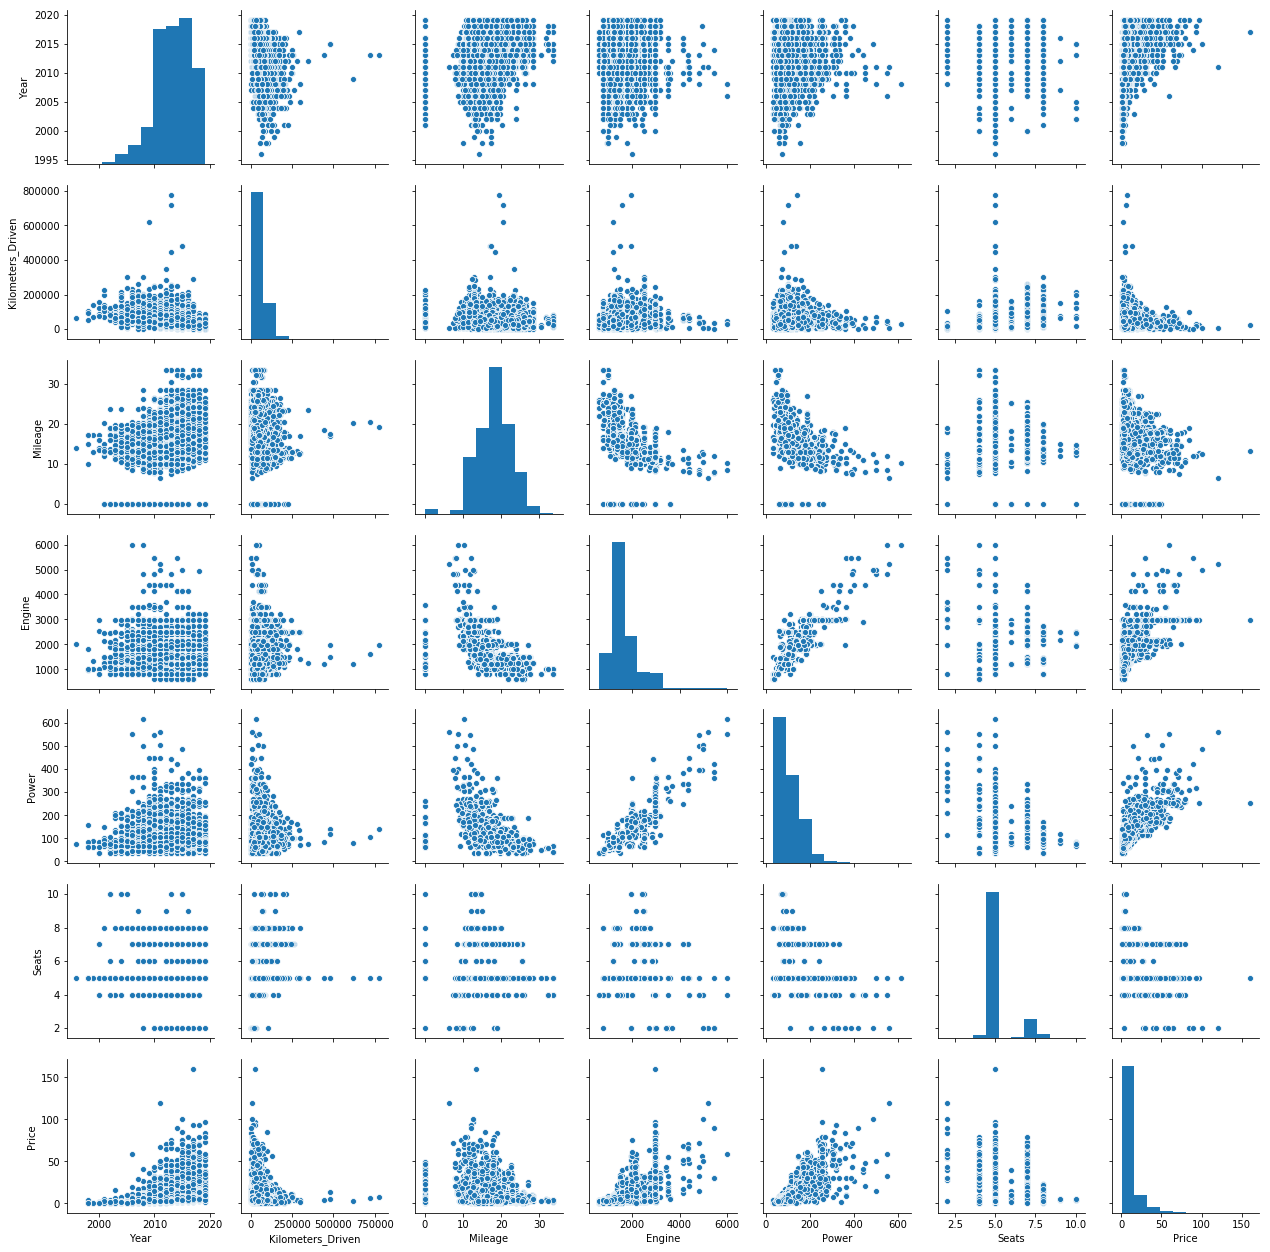

In [64]:
sns.pairplot(train)

## Feature engineering

In [65]:
data_new['Owner_Type'].value_counts()

First             5950
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [356]:
#Create a new feature for cars with 5 seats
train['Seats_5'] = (train['Seats'] == 5) *1

#create a new feature for owner
owner = ({'First':0, 'Second': 1, 'Third': 2, 'Fourth & Above':2})
train['Owner_most'] = train['Owner_Type'].map(owner)

#Use lambda function to create a new feature for Fuel
train['Fuel_most'] = train.Fuel_Type.apply(lambda x:int(0) if x == 'Diesel' else int(1) if x == 'Petrol' else int(2))

#Manually encode Transmission
trans = ({'Manual': 1, 'Automatic': 0})
train['Transmission'] = train['Transmission'].map(trans)

#Create new features for Maruti and Hyndai since they have a high frequency
def new_feat(a):
    if a == 'Maruti':
        col = 0
    elif a == 'Hyundai':
        col = 0
    else:
        col = 1
    return col
train['Name_feat'] = train['Name_gen'].map(new_feat)

#Create dummy values for categorical features
print('Shape of data before encoding ', train.shape)
train = pd.get_dummies(train, columns = ['Location', 'Fuel_Type', 'Owner_Type', 'Name_gen'], drop_first = True)
print('Shape of data after encoding ', train.shape)

In [360]:
train.head()

,Name,Year,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats,New_Price,Price,...,Name_gen_Mitsubishi,Name_gen_Nissan,Name_gen_Porsche,Name_gen_Renault,Name_gen_Skoda,Name_gen_Smart,Name_gen_Tata,Name_gen_Toyota,Name_gen_Volkswagen,Name_gen_Volvo
0,Maruti Wagon R LXI CNG,2010,72000,1,26.60,998.0,58.16,5.0,NaN,1.75,...,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,1,19.67,1582.0,126.20,5.0,NaN,12.50,...,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,2011,46000,1,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,...,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,87000,1,20.77,1248.0,88.76,7.0,NaN,6.00,...,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,0,15.20,1968.0,140.80,5.0,NaN,17.74,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection

In [362]:
#using recursive feature selection on a base model. lets say Random Forest regressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X = train.loc[:,train.columns != 'Price']
Y = train.loc[:,train.columns == 'Price']

ran_reg = RandomForestRegressor(n_estimators = 50)

rfe_selector = RFE(estimator = RandomForestRegressor(), n_features_to_select = 25)
rfe_selector = rfe_selector.fit(X,Y)

table = pd.DataFrame(rfe_selector.support_)
indx = table[table[0] == True].index
indx

[ True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True False  True  True  True False  True False False
 False False False False  True  True False False False False False False
  True False False False  True False False  True False False  True  True
 False False False False False False False False False False]


In [363]:
table = pd.DataFrame(rfe_selector.support_)
indx = table[table[0] == True].index
indx

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 17, 18, 19,
            21, 28, 29, 36, 40, 43, 46, 47],
           dtype='int64')

In [368]:
#X = train.iloc[:,[0,1,2,3,4,5,6,7,8,12,13,15,17,19,24,28,29,36,40,43,46,47,50,55]]

X = train.iloc[:,[0,1,2,3,4,5,6,7,8,11,12,13,14,15,17,18,19,21,28,29,36,40,43,46,47]]
y = train.loc[:,train.columns != 'Price']

In [ ]:
#score metric
def scorelog(y_test,y_pred):
    y_test = np.log(y_pred)
    y_pred = np.log(y_pred)
    return 1 - ((np.sum((y_test - y_pred) ** 2))/ len(y_test)) ** 1/2

## Normalizing and spliting

In [369]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

## Build our model(use MAE as evaluation metric)

In [365]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor

In [377]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor

RF_reg = RandomForestRegressor().fit(X_train,y_train)
RF_reg_pred = RF_reg.predict(X_test)

svr = SVR(gamma = 'scale').fit(X_train,y_train)
svr_pred = svr.predict(X_test)

DT_reg = DecisionTreeRegressor().fit(X_train,y_train)
DTree_pred = DT_reg.predict(X_test)

Ex_reg = ExtraTreesRegressor(n_estimators= 50).fit(X_train,y_train)
Ex_reg_pred = Ex_reg.predict(X_test)

print('Mean absolute error of  Decision = ', mean_absolute_error(y_test,DTree_pred))
print('Mean absolute error for svr = ', mean_absolute_error(y_test,svr_pred))
print('Mean absolute error of Random Forest = ', mean_absolute_error(y_test,RF_reg_pred))
print('Mean absolute error of ExtraTree = ', mean_absolute_error(y_test,Ex_reg_pred))

Mean absolute error of  Decision =  0.03607142857142882
Mean absolute error for svr =  1.3690973367334818
Mean absolute error of Random Forest =  0.03598089700996683
Mean absolute error of ExtraTree =  0.03639169435215972


In [378]:

ada_boost = AdaBoostRegressor(base_estimator =ExtraTreesRegressor(n_estimators= 50))
ada_boost.fit(X_train, y_train)
ada_boost_pred = ada_boost.predict(X_test)
print('Mean absolute error of ada_boost_pred', mean_absolute_error(y_test,ada_boost_pred))


Mean absolute error of ada_boost_pred 0.018963787375415375


## Usin avreage and weighted average technique

In [379]:
#Picking from our top 3 performance
average = (RF_reg_pred + DTree_pred + Ex_reg_pred)/ 3
print('Mean absolute error of  average ', mean_absolute_error(y_test,average))

weighted_average = ((DTree_pred * 0.4) + (RF_reg_pred * 0.4) + (Ex_reg_pred)* 0.2)
print('Mean absolute error of weighted_average', mean_absolute_error(y_test,weighted_average))


Mean absolute error of  average  0.02368687707641197
Mean absolute error of weighted_average 0.02295122923588043


In [264]:
#score metric
def scorelog(pred,test):
    test = np.log(test)
    pred = np.log(pred)
    return 1 - ((np.sum((pred - test) ** 2))/ len(test)) ** 1/2